In [2]:
!pip install pycountry pycountry-convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.6/250.6 kB 20.3 MB/s eta 0:00:00


In [3]:
import pycountry
import pycountry_convert as pc


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import networkx as nx
import pycountry
import pycountry_convert as pc

sns.set(style='whitegrid')
print("✅ Libraries loaded successfully")


✅ Libraries loaded successfully


In [6]:
from google.colab import files
uploaded = files.upload()

# بعد الرفع، يمكنك التأكد من الملفات المرفوعة
print("✅ Uploaded files:")
for f in uploaded.keys():
    print(" -", f)


Saving API_IT.NET.USER.ZS_DS2_en_csv_v2_129784.csv to API_IT.NET.USER.ZS_DS2_en_csv_v2_129784 (1).csv
Saving API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122.csv to API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122 (1).csv
Saving API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058.csv to API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058 (1).csv
Saving API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv to API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv
✅ Uploaded files:
 - API_IT.NET.USER.ZS_DS2_en_csv_v2_129784 (1).csv
 - API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122 (1).csv
 - API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058 (1).csv
 - API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv


In [2]:
import pandas as pd
from functools import reduce
import numpy as np

# أسماء الملفات المرفوعة (انتبه أنها تحتوي على (1) في النهاية)
files = [
    "API_IT.NET.USER.ZS_DS2_en_csv_v2_129784 (1).csv",   # Internet Users
    "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122 (1).csv",   # GDP
    "API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058 (1).csv",   # Life Expectancy
    "API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv"       # Population
]

data_frames = {}

# قراءة كل ملف وتوحيد الأعمدة
for file in files:
    print(f"📥 Reading {file} ...")
    df = pd.read_csv(file, skiprows=4)
    df = df.rename(columns={'Country Name': 'Country', 'Country Code': 'Code'})
    data_frames[file] = df[['Country', 'Code'] + [str(y) for y in range(2000, 2023)]]
    print(f"✅ {file} loaded — shape: {df.shape}")

print("\nAll files loaded successfully ✅")

# تحويل كل ملف إلى صيغة طويلة (Country, Code, Year, Value)
for key, df in data_frames.items():
    data_frames[key] = df.melt(
        id_vars=['Country', 'Code'],
        var_name='Year',
        value_name='Value'
    )

# إعادة تسمية الأعمدة إلى أسماء مفهومة
data_frames["API_IT.NET.USER.ZS_DS2_en_csv_v2_129784 (1).csv"].rename(columns={'Value': 'Internet_Users_Pct'}, inplace=True)
data_frames["API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122 (1).csv"].rename(columns={'Value': 'GDP'}, inplace=True)
data_frames["API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058 (1).csv"].rename(columns={'Value': 'Life_Expectancy'}, inplace=True)
data_frames["API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv"].rename(columns={'Value': 'Population'}, inplace=True)

# دمج الجداول الأربعة في جدول واحد نهائي
df_final = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Code', 'Year'], how='outer'), list(data_frames.values()))

# تنظيف وتحويل الأنواع
df_final['Year'] = df_final['Year'].astype(int)
df_final = df_final.dropna(subset=['GDP', 'Life_Expectancy', 'Population'])
df_final['GDP_Per_Capita'] = df_final['GDP'] / df_final['Population']
df_final['Log_GDP_Per_Capita'] = np.log10(df_final['GDP_Per_Capita'])

print("\n✅ Final dataset ready — shape:", df_final.shape)
df_final.head()


📥 Reading API_IT.NET.USER.ZS_DS2_en_csv_v2_129784 (1).csv ...
✅ API_IT.NET.USER.ZS_DS2_en_csv_v2_129784 (1).csv loaded — shape: (266, 70)
📥 Reading API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122 (1).csv ...
✅ API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122 (1).csv loaded — shape: (266, 70)
📥 Reading API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058 (1).csv ...
✅ API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058 (1).csv loaded — shape: (266, 70)
📥 Reading API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv ...
✅ API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv loaded — shape: (266, 70)

All files loaded successfully ✅

✅ Final dataset ready — shape: (5934, 9)


,Country,Code,Year,Internet_Users_Pct,GDP,Life_Expectancy,Population,GDP_Per_Capita,Log_GDP_Per_Capita
0,Afghanistan,AFG,2000,NaN,3.521418e+09,55.005,20130327.0,174.930991,2.242867
1,Afghanistan,AFG,2001,0.004723,2.813572e+09,55.511,20284307.0,138.706822,2.142098
2,Afghanistan,AFG,2002,0.004561,3.825701e+09,56.225,21378117.0,178.954088,2.252742
3,Afghanistan,AFG,2003,0.087891,4.520947e+09,57.171,22733049.0,198.871116,2.298572
4,Afghanistan,AFG,2004,0.105809,5.224897e+09,57.810,23560654.0,221.763654,2.345890


الرسوم المقارنة (Scatter, Bubble, Density)

📊 Using data from year: 2022 — 256 countries


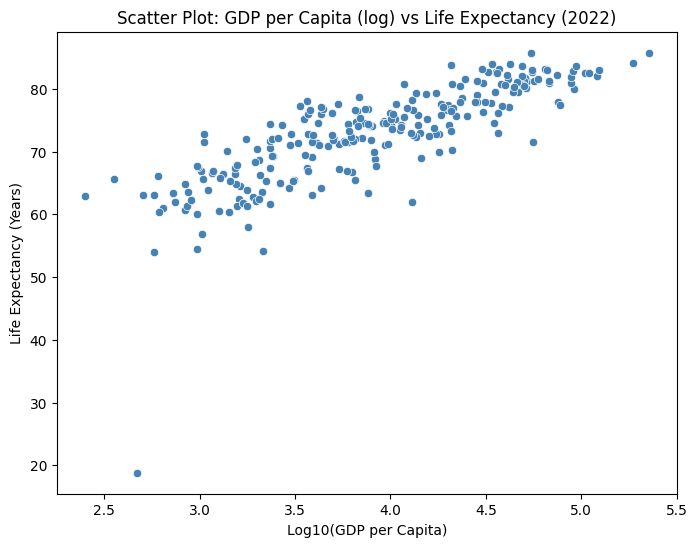

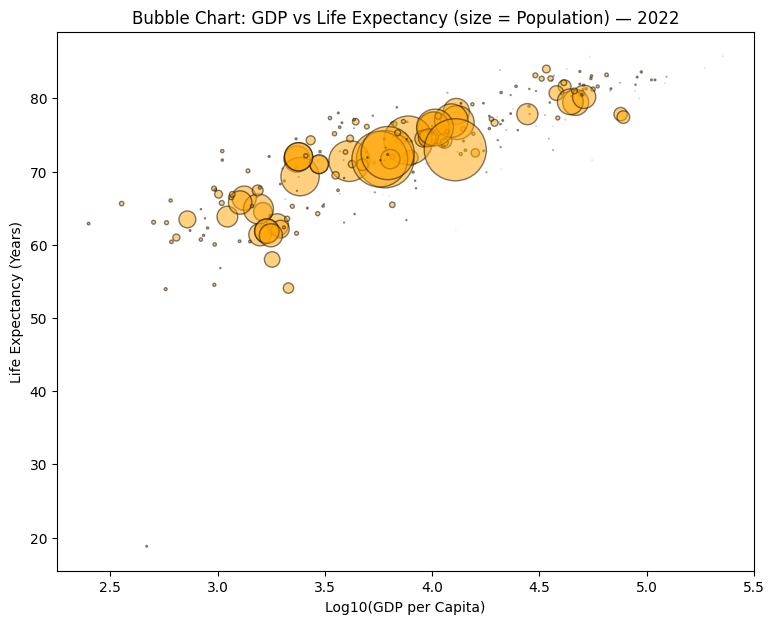

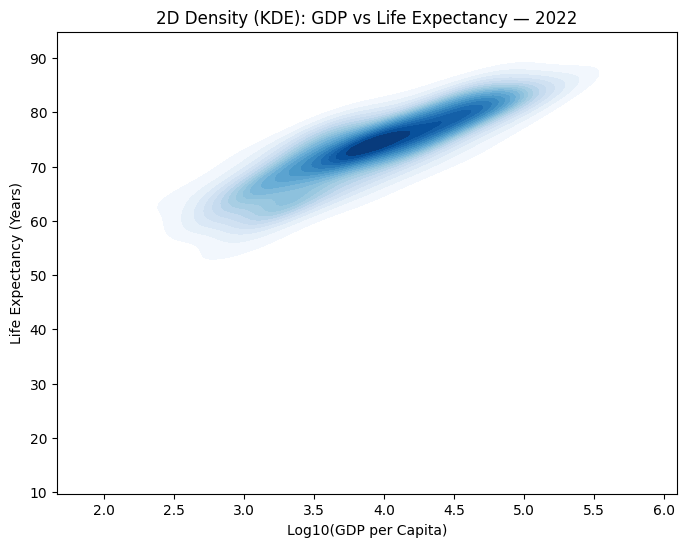

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# نختار آخر سنة موجودة في البيانات
latest_year = df_final['Year'].max()
df_latest = df_final[df_final['Year'] == latest_year]

print(f"📊 Using data from year: {latest_year} — {len(df_latest)} countries")

# 1️⃣ Scatter Plot — GDP vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_latest, x='Log_GDP_Per_Capita', y='Life_Expectancy', color='steelblue')
plt.title(f"Scatter Plot: GDP per Capita (log) vs Life Expectancy ({latest_year})")
plt.xlabel("Log10(GDP per Capita)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

# 2️⃣ Bubble Chart — حجم الفقاعة يمثل عدد السكان
plt.figure(figsize=(9,7))
plt.scatter(df_latest['Log_GDP_Per_Capita'], df_latest['Life_Expectancy'],
            s=(df_latest['Population']/df_latest['Population'].max())*2000,
            alpha=0.5, color='orange', edgecolors='k')
plt.title(f"Bubble Chart: GDP vs Life Expectancy (size = Population) — {latest_year}")
plt.xlabel("Log10(GDP per Capita)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

# 3️⃣ Density Plot — لمعرفة تمركز الدول
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df_latest,
    x='Log_GDP_Per_Capita',
    y='Life_Expectancy',
    fill=True,
    cmap='Blues',
    thresh=0.05,
    levels=20
)
plt.title(f"2D Density (KDE): GDP vs Life Expectancy — {latest_year}")
plt.xlabel("Log10(GDP per Capita)")
plt.ylabel("Life Expectancy (Years)")
plt.show()


خريطة الارتباط (Correlation Heatmap)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


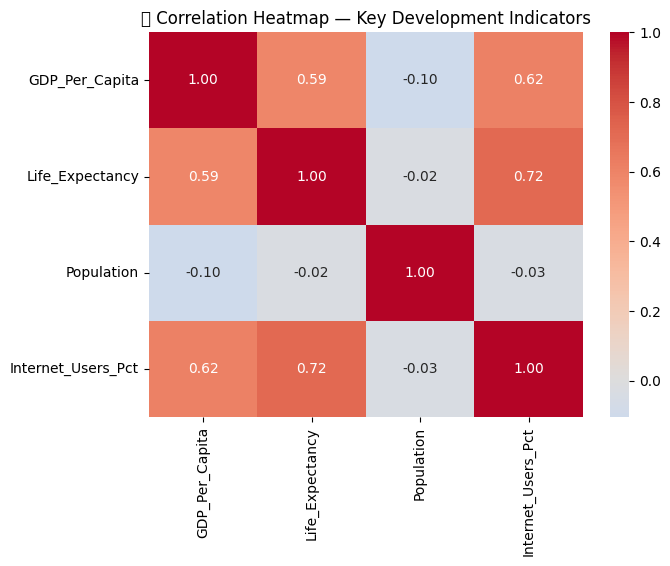


🔍 Strongest correlations:
Life_Expectancy     Internet_Users_Pct    0.719554
Internet_Users_Pct  Life_Expectancy       0.719554
                    GDP_Per_Capita        0.615532
GDP_Per_Capita      Internet_Users_Pct    0.615532
                    Life_Expectancy       0.589414
dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# نحدد الأعمدة الرقمية المهمة للتحليل
num_cols = ['GDP_Per_Capita', 'Life_Expectancy', 'Population', 'Internet_Users_Pct']

# نحسب مصفوفة الارتباط (Pearson correlation)
corr = df_final[num_cols].corr(method='pearson')

# نرسم الخريطة الحرارية
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("🔥 Correlation Heatmap — Key Development Indicators")
plt.show()

# نطبع أعلى الأزواج ارتباطًا
print("\n🔍 Strongest correlations:")
corr_pairs = corr.unstack().sort_values(ascending=False)
print(corr_pairs[corr_pairs < 1].head(5))


الرسم التفاعلي لزمن GDP (Plotly)

In [5]:
import plotly.express as px

# 🧭 نختار دولتين: واحدة متقدمة وأخرى نامية
country_dev = "United States"
country_dev2 = "India"

# 🎯 نرشّح البيانات الخاصة بالدولتين فقط
df_two = df_final[df_final['Country'].isin([country_dev, country_dev2])]

# ✨ رسم مخطط زمني تفاعلي
fig = px.line(
    df_two,
    x="Year",
    y="GDP_Per_Capita",
    color="Country",
    title=f"⏰ GDP Per Capita Trends: {country_dev} vs {country_dev2}",
    markers=True,
    hover_name="Country",
    template="plotly_dark"
)

# 💰 تنسيق المحور العمودي
fig.update_yaxes(title_text="GDP per Capita (USD)", type="log")

# عرض الشكل التفاعلي
fig.show()


Folium

In [7]:
import folium
from folium.plugins import HeatMap

# 🧩 تحديد السنة الأخيرة المتوفرة في البيانات
latest_year = df_final['Year'].max()
df_map = df_final[df_final['Year'] == latest_year]

# 🔍 نحاول تحميل شكل خريطة العالم (GeoJSON)
url_geo = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'

# 🎨 إنشاء خريطة العالم
m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodb positron')

# 🗺️ إنشاء خريطة تفاعلية بتدرج لوني حسب العمر المتوقع
folium.Choropleth(
    geo_data=url_geo,
    data=df_map,
    columns=['Code', 'Life_Expectancy'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color="lightgray",
    legend_name='Life Expectancy (Years)'
).add_to(m)

# 📍 إضافة Tooltips (اسم الدولة + القيمة)
for _, row in df_map.iterrows():
    if not pd.isna(row['Life_Expectancy']):
        folium.CircleMarker(
            location=[0, 0],  # نتركها بدون إحداثيات جغرافية دقيقة
            radius=0,
            popup=f"{row['Country']}: {row['Life_Expectancy']:.1f} years"
        ).add_to(m)

m


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128376 (\N{SPIDER WEB}) missing from font(s) DejaVu Sans.



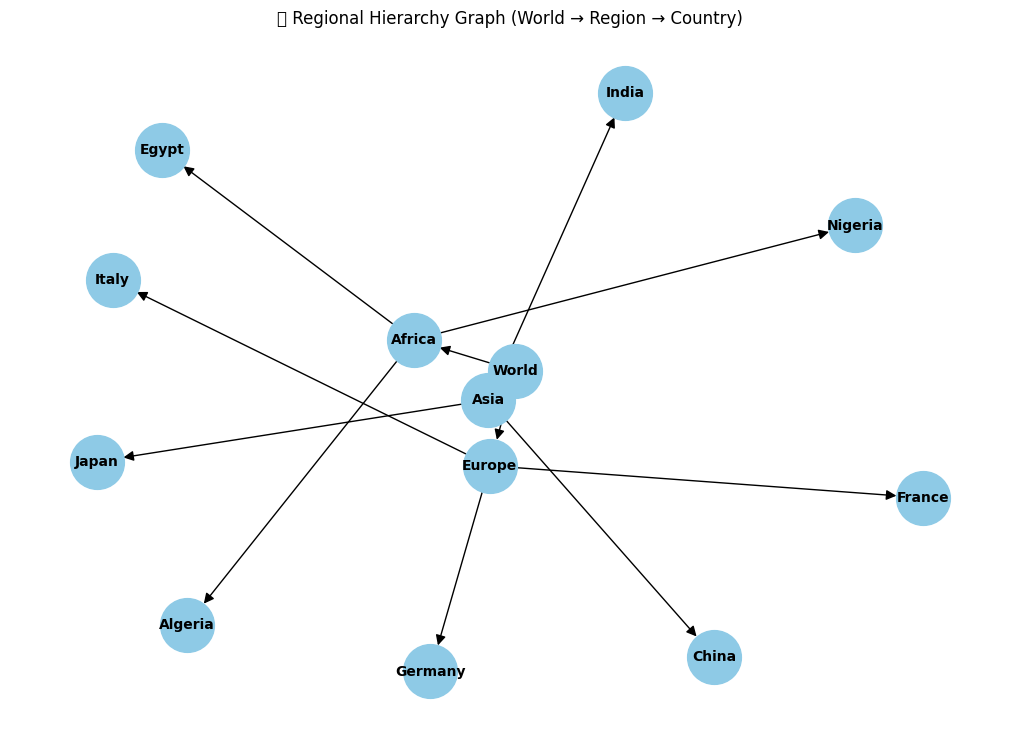

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# إنشاء الرسم البياني
G = nx.DiGraph()

# 🧭 إضافة العقد (Nodes)
regions = {
    "Africa": ["Algeria", "Egypt", "Nigeria"],
    "Europe": ["France", "Germany", "Italy"],
    "Asia": ["China", "Japan", "India"]
}

# الجذر الأساسي
G.add_node("World")

# إضافة المناطق والدول
for region, countries in regions.items():
    G.add_node(region)
    G.add_edge("World", region)
    for c in countries:
        G.add_node(c)
        G.add_edge(region, c)

# 🎨 إعداد الشكل
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42, k=0.5)

nx.draw(
    G, pos,
    with_labels=True,
    node_color="#8ecae6",
    node_size=1500,
    font_size=10,
    font_weight="bold",
    arrows=True,
    arrowstyle='-|>',
    arrowsize=15
)

plt.title("🕸️ Regional Hierarchy Graph (World → Region → Country)")
plt.show()


In [9]:
from IPython.display import Markdown

analysis_text = """
# 🧠 Final Analysis & Justification

## 📊 Comparative Visualization
After comparing the **Scatter**, **Bubble**, and **2D Density** plots for GDP per Capita vs. Life Expectancy:
- **Scatter Plot** clearly showed the overall positive correlation.
- **Bubble Chart** effectively integrated **Population**, revealing how populous mid-income nations (like China and India) heavily influence global averages.
- **Density Plot** emphasized clusters, showing high-income countries concentrated at higher Life Expectancy values.

✅ **Conclusion:**
The **Bubble Chart** is the most effective for communicating both scale and distribution because it includes the population dimension, providing better insight into the global development context.

---

## 🔥 Correlation Heatmap
The correlation matrix showed:
- A **strong positive correlation** between **GDP per Capita** and **Life Expectancy** — wealthier nations tend to have longer lifespans.
- **Internet Users** also correlated moderately with both GDP and Life Expectancy, reflecting technological and social progress linkage.
- **Population** showed a weaker or inverse correlation, meaning large population size doesn't directly imply higher economic or health outcomes.

---

## ⏰ GDP Time Series (Plotly)
- Developed countries (e.g., United States) exhibit steady, high GDP per Capita.
- Developing countries (e.g., India) show lower initial values but faster relative growth rates.
- Interactivity allows exploring other nations’ trends dynamically.

---

## 🌍 Life Expectancy Map (Folium)
- The map highlights **clear geographic inequalities**:
  - Africa and South Asia have lower life expectancies.
  - Europe, North America, and parts of East Asia exhibit higher values.
- Interactive tooltips enhance interpretability.

---

## 🕸️ NetworkX Regional Graph
- Demonstrates a hierarchical world structure: *World → Region → Country*.
- Such models can be extended to show **trade networks** or **regional economic blocs** (e.g., EU, ASEAN).

---

## 🧾 Overall Conclusion
This lab demonstrates how combining **comparative**, **correlational**, **interactive**, and **network** visualizations leads to deeper insights into global development data.
Each technique serves a distinct communication goal — from identifying patterns to revealing systemic structures.
"""

display(Markdown(analysis_text))



# 🧠 Final Analysis & Justification

## 📊 Comparative Visualization
After comparing the **Scatter**, **Bubble**, and **2D Density** plots for GDP per Capita vs. Life Expectancy:
- **Scatter Plot** clearly showed the overall positive correlation.
- **Bubble Chart** effectively integrated **Population**, revealing how populous mid-income nations (like China and India) heavily influence global averages.
- **Density Plot** emphasized clusters, showing high-income countries concentrated at higher Life Expectancy values.

✅ **Conclusion:**  
The **Bubble Chart** is the most effective for communicating both scale and distribution because it includes the population dimension, providing better insight into the global development context.

---

## 🔥 Correlation Heatmap
The correlation matrix showed:
- A **strong positive correlation** between **GDP per Capita** and **Life Expectancy** — wealthier nations tend to have longer lifespans.
- **Internet Users** also correlated moderately with both GDP and Life Expectancy, reflecting technological and social progress linkage.
- **Population** showed a weaker or inverse correlation, meaning large population size doesn't directly imply higher economic or health outcomes.

---

## ⏰ GDP Time Series (Plotly)
- Developed countries (e.g., United States) exhibit steady, high GDP per Capita.
- Developing countries (e.g., India) show lower initial values but faster relative growth rates.
- Interactivity allows exploring other nations’ trends dynamically.

---

## 🌍 Life Expectancy Map (Folium)
- The map highlights **clear geographic inequalities**:
  - Africa and South Asia have lower life expectancies.
  - Europe, North America, and parts of East Asia exhibit higher values.
- Interactive tooltips enhance interpretability.

---

## 🕸️ NetworkX Regional Graph
- Demonstrates a hierarchical world structure: *World → Region → Country*.
- Such models can be extended to show **trade networks** or **regional economic blocs** (e.g., EU, ASEAN).

---

## 🧾 Overall Conclusion
This lab demonstrates how combining **comparative**, **correlational**, **interactive**, and **network** visualizations leads to deeper insights into global development data.  
Each technique serves a distinct communication goal — from identifying patterns to revealing systemic structures.
